# AV2

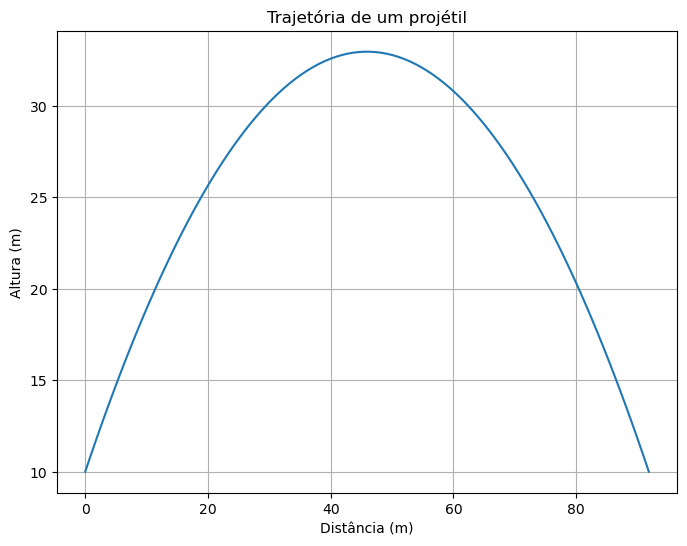

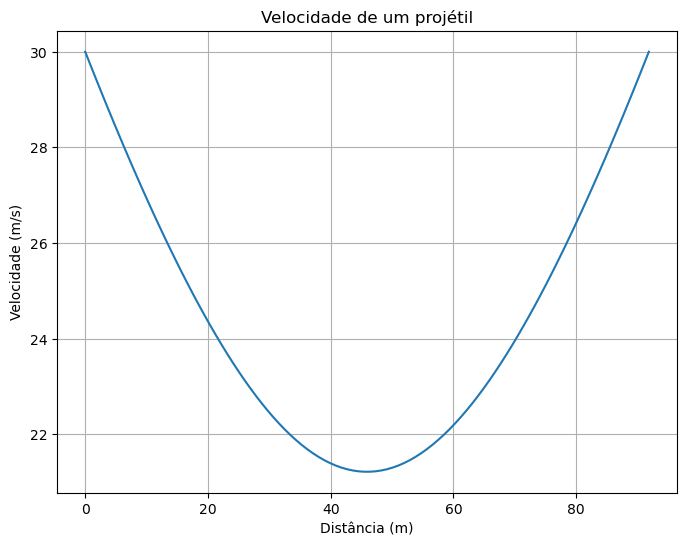

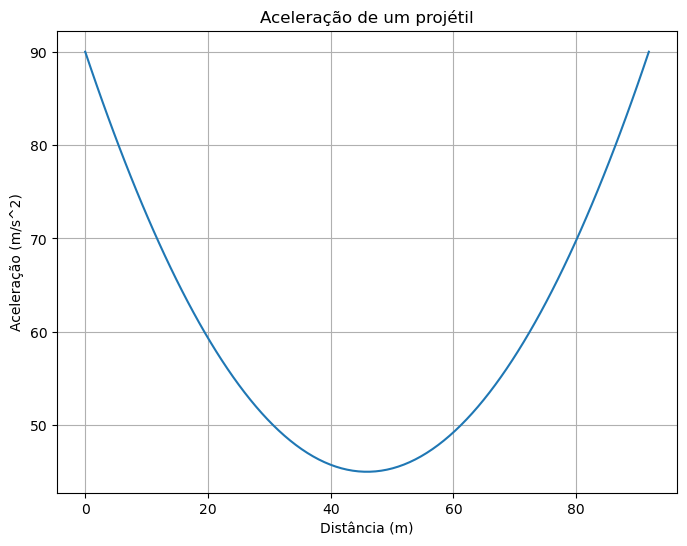

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def calcular_trajetoria(h, v0, angulo, k, g):
    # Converter o ângulo para radianos
    angulo_rad = np.radians(angulo)
    
    # Componentes horizontal e vertical da velocidade inicial
    v0x = v0 * np.cos(angulo_rad)
    v0y = v0 * np.sin(angulo_rad)
    
    # Tempo de voo máximo
    t_max = 2 * v0y / g
    
    # Vetor de tempo
    t = np.linspace(0, t_max, num=100)
    
    # Componentes horizontal e vertical da posição
    x = v0x * t
    y = h + v0y * t - (1/2) * g * t**2
    
    # Vetor de velocidade
    v = np.sqrt(v0x**2 + (v0y - g * t)**2)
    
    # Vetor de aceleração
    a = k * v * v
    
    return x, y, v, a

# Parâmetros do problema
h = 10  # altura inicial em metros
v0 = 30  # velocidade inicial em m/s
angulo = 45  # ângulo de lançamento em graus
k = 0.1  # coeficiente de resistência do ar
g = 9.8  # aceleração da gravidade em m/s^2

# Calcular a trajetória
x, y, v, a = calcular_trajetoria(h, v0, angulo, k, g)

# Plotar o gráfico da trajetória
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('Distância (m)')
plt.ylabel('Altura (m)')
plt.title('Trajetória de um projétil')
plt.grid(True)
plt.show()

# Plotar o gráfico da velocidade
plt.figure(figsize=(8, 6))
plt.plot(x, v)
plt.xlabel('Distância (m)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade de um projétil')
plt.grid(True)
plt.show()

# Plotar o gráfico da aceleração
plt.figure(figsize=(8, 6))
plt.plot(x, a)
plt.xlabel('Distância (m)')
plt.ylabel('Aceleração (m/s^2)')
plt.title('Aceleração de um projétil')
plt.grid(True)
plt.show()


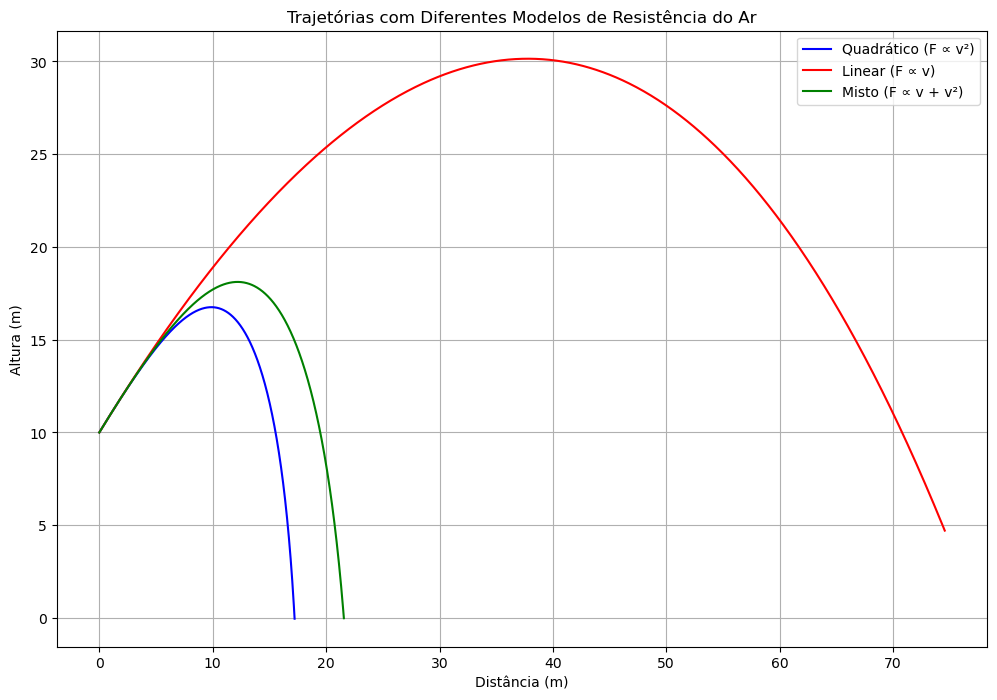

In [2]:

import matplotlib.pyplot as plt
import numpy as np

def calcular_trajetoria(h, v0, angulo, k, g, modelo='quadratico'):
    """
    Calcula a trajetória do projétil com diferentes modelos de resistência do ar
    
    Parâmetros:
    h: altura inicial (m)
    v0: velocidade inicial (m/s)
    angulo: ângulo de lançamento (graus)
    k: coeficiente de resistência do ar
    g: aceleração da gravidade (m/s²)
    modelo: tipo de resistência do ar ('quadratico', 'linear', 'misto')
    
    Retorna:
    x, y, v, a - arrays com posições, velocidades e acelerações
    """
    angulo_rad = np.radians(angulo)
    v0x = v0 * np.cos(angulo_rad)
    v0y = v0 * np.sin(angulo_rad)
    
    # Tempo de voo estimado (sem resistência do ar para inicialização)
    t_max = 2 * v0y / g
    t = np.linspace(0, t_max, num=1000)
    
    # Inicialização dos arrays
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    
    # Condições iniciais
    x[0], y[0] = 0, h
    vx[0], vy[0] = v0x, v0y
    
    # Integração numérica (método de Euler)
    dt = t[1] - t[0]
    for i in range(1, len(t)):
        v = np.sqrt(vx[i-1]**2 + vy[i-1]**2)
        
        # Aplicar modelo de resistência do ar selecionado
        if modelo == 'quadratico':
            # Modelo quadrático (F = -k*v²)
            ax = -k * v * vx[i-1]
            ay = -g - k * v * vy[i-1]
        elif modelo == 'linear':
            # Modelo linear (F = -k*v)
            ax = -k * vx[i-1]
            ay = -g - k * vy[i-1]
        elif modelo == 'misto':
            # Modelo misto (F = -k1*v - k2*v²)
            k1 = k * 0.3  # parte linear
            k2 = k * 0.7  # parte quadrática
            ax = -k1 * vx[i-1] - k2 * v * vx[i-1]
            ay = -g - k1 * vy[i-1] - k2 * v * vy[i-1]
        else:
            raise ValueError("Modelo desconhecido")
        
        # Atualizar velocidades e posições
        vx[i] = vx[i-1] + ax * dt
        vy[i] = vy[i-1] + ay * dt
        x[i] = x[i-1] + vx[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt
        
        # Parar se o projétil atingir o solo
        if y[i] < 0:
            t = t[:i+1]
            x = x[:i+1]
            y = y[:i+1]
            vx = vx[:i+1]
            vy = vy[:i+1]
            break
    
    v = np.sqrt(vx**2 + vy**2)
    a = np.sqrt((vx[1:] - vx[:-1])**2 + (vy[1:] - vy[:-1])**2) / dt
    a = np.append(a, a[-1])  # manter mesmo tamanho
    
    return x, y, v, a

# Parâmetros do problema
h = 10
v0 = 30
angulo = 45
k = 0.1
g = 9.8

# Calcular trajetórias para diferentes modelos
modelos = ['quadratico', 'linear', 'misto']
cores = ['b', 'r', 'g']
nomes = ['Quadrático (F ∝ v²)', 'Linear (F ∝ v)', 'Misto (F ∝ v + v²)']

plt.figure(figsize=(12, 8))
for modelo, cor, nome in zip(modelos, cores, nomes):
    x, y, v, a = calcular_trajetoria(h, v0, angulo, k, g, modelo)
    plt.plot(x, y, color=cor, label=nome)

plt.xlabel('Distância (m)')
plt.ylabel('Altura (m)')
plt.title('Trajetórias com Diferentes Modelos de Resistência do Ar')
plt.legend()
plt.grid(True)
plt.show()